## Zadanie 1
Liczba strzelonych bramek w kolejnych meczach przez pewną drużynę
piłkarską jest następująca:

---

2, 3, 0, 0, 1, 3, 1, 0, 2, 0, 1, 1, 1, 0, 3, 2, 0, 2, 0, 1, 1, 2, 0, 3, 1, 1,
0, 1, 0, 2, 4, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 2

---

Zbadać, czy ilość zdobytych goli w meczu jest zgodna z rozkładem
Poissona. Parametry rozkładu oszacować na podstawie danych.


### Hipotezy statystyczne:
- **H₀ (hipoteza zerowa):** rozkład liczby goli jest zgodny z rozkładem Poissona.
- **H₁ (hipoteza alternatywna):** rozkład liczby goli nie jest zgodny z rozkładem Poissona.


In [1]:
gole <- c(2, 3, 0, 0, 1, 3, 1, 0, 2, 0, 1, 1, 1, 0, 3, 2, 0, 2, 0, 1, 1, 2, 0, 3,
          1, 1, 0, 1, 0, 2, 4, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 2)

In [2]:
n <- length(gole)

In [3]:
n

[1] 43

In [4]:
# Oszacowanie parametru λ dla rozkładu Poissona
lambda_hat <- mean(gole)

In [5]:
lambda_hat

[1] 1.093023

In [6]:
## Dane empiryczne
### Ile razy występuje dana liczba goli
obs <- table(gole)
obs

gole
 0  1  2  3  4 
15 15  8  4  1 

In [7]:
k <- 0:max(gole)

In [8]:
k

[1] 0 1 2 3 4

In [9]:
# Teoretyczne prawdopodobieństwa z rozkładu Poissona
probs <- dpois(k, lambda_hat)

In [10]:
probs

[1] 0.33520156 0.36638310 0.20023262 0.07295297 0.01993482

In [11]:
# Oczekiwane liczności
exp <- probs * n
names(exp) <- k

exp

0          1          2          3          4 
14.4136671 15.7544733  8.6100029  3.1369778  0.8571974

In [12]:
## Wizualizacja
df <- data.frame(
  gole = factor(names(obs), levels = as.character(0:max(gole))),
  obserwowane = as.numeric(obs),
  oczekiwane = as.numeric(exp)
)

In [13]:
# Załadowanie biblioteki
library(ggplot2)

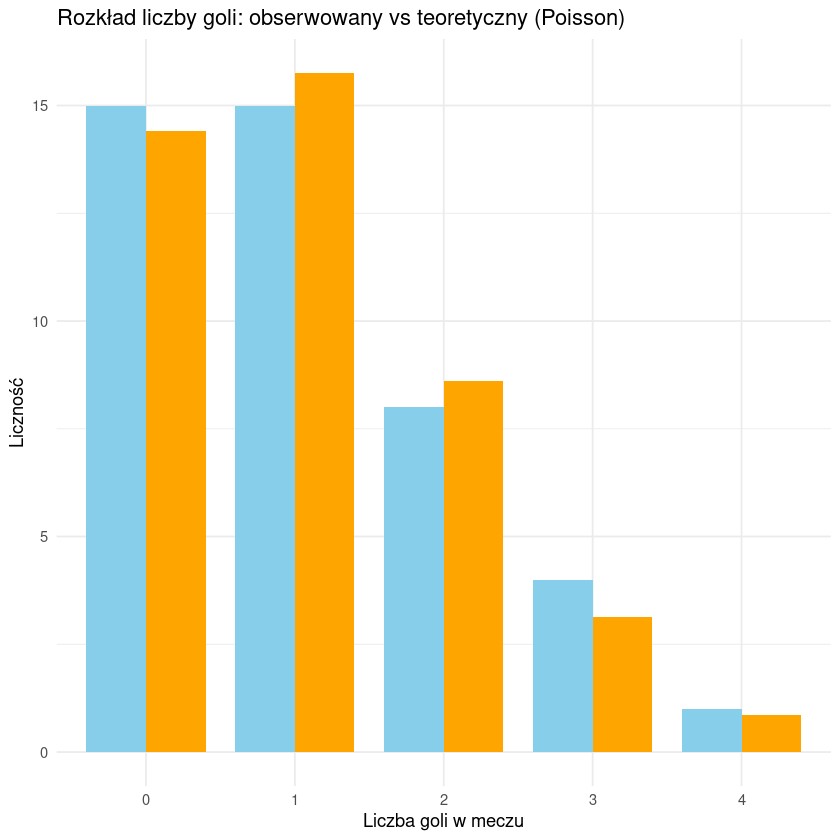

In [14]:
ggplot(df, aes(x = gole)) +
  geom_bar(aes(y = obserwowane), stat = "identity", fill = "skyblue", width = 0.4, position = position_nudge(x = -0.2)) +
  geom_bar(aes(y = oczekiwane), stat = "identity", fill = "orange", width = 0.4, position = position_nudge(x = 0.2)) +
  labs(
    title = "Rozkład liczby goli: obserwowany vs teoretyczny (Poisson)",
    x = "Liczba goli w meczu",
    y = "Liczność"
  ) +
  theme_minimal()

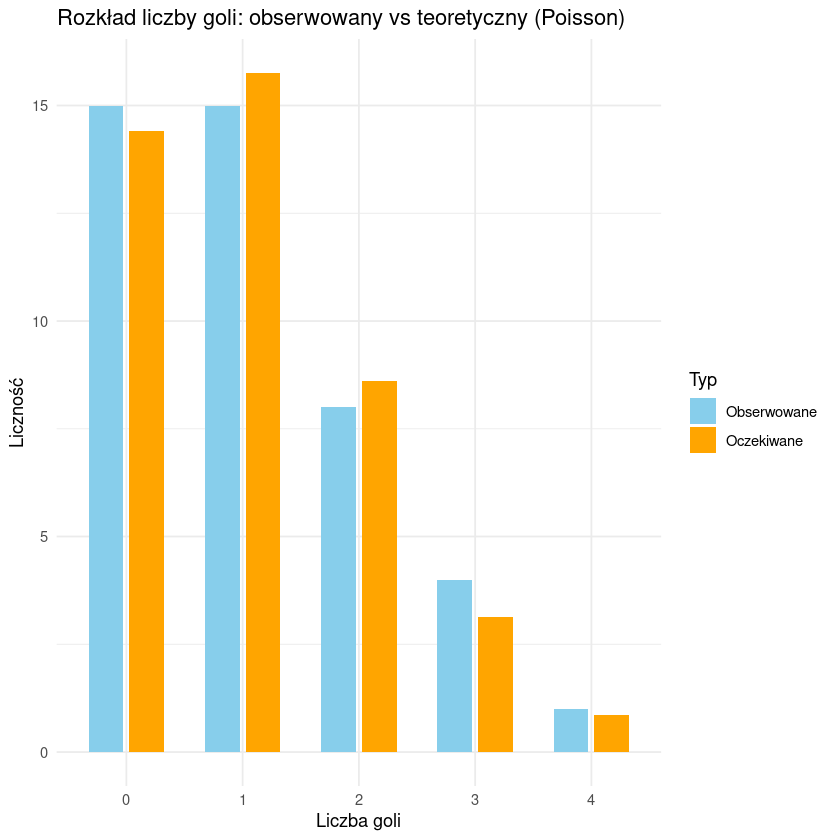

In [20]:
gole_kategorie <- as.character(0:max(gole))

obserwowane <- as.numeric(table(factor(gole, levels = 0:max(gole))))
oczekiwane <- exp

df_obserw <- data.frame(gole = gole_kategorie, liczność = obserwowane, typ = "Obserwowane")
df_oczek <- data.frame(gole = gole_kategorie, liczność = oczekiwane, typ = "Oczekiwane")
df_final <- rbind(df_obserw, df_oczek)

ggplot(df_final, aes(x = gole, y = liczność, fill = typ)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7), width = 0.6) +
  scale_fill_manual(values = c("Obserwowane" = "skyblue", "Oczekiwane" = "orange")) +
  labs(
    title = "Rozkład liczby goli: obserwowany vs teoretyczny (Poisson)",
    x = "Liczba goli",
    y = "Liczność",
    fill = "Typ"
  ) +
  theme_minimal()

In [ ]:
## Teraz powinniśmy przeprowadzić test zgodności

In [21]:
# Oczekiwane liczności
oczekiwane

# Warunki:
sum(oczekiwane < 1)               # ile klas ma < 1
sum(oczekiwane < 5) / length(oczekiwane)  # jaki % ma < 5

0          1          2          3          4 
14.4136671 15.7544733  8.6100029  3.1369778  0.8571974

[1] 1

[1] 0.4

In [22]:
# bazując na tych danych dobrze by było połączyć 3 i 4
obs

gole
 0  1  2  3  4 
15 15  8  4  1 

In [23]:
obs["3+"] <- sum(obs["3"], obs["4"])
obs <- obs[c("0", "1", "2", "3+")]

In [24]:
obs

 0  1  2 3+ 
15 15  8  5 

In [25]:
oczekiwane

0          1          2          3          4 
14.4136671 15.7544733  8.6100029  3.1369778  0.8571974

In [27]:
oczekiwane["3+"] <- sum(oczekiwane[4:5])

In [28]:
oczekiwane

0          1          2          3          4         3+ 
14.4136671 15.7544733  8.6100029  3.1369778  0.8571974  3.9941752

In [29]:
oczekiwane <- oczekiwane[c(1:3, 6)]
names(oczekiwane) <- names(obs)

In [30]:
oczekiwane

0         1         2        3+ 
14.413667 15.754473  8.610003  3.994175

In [31]:
test_chikwadrat <- chisq.test(
  x = as.numeric(obs),
  p = oczekiwane / sum(oczekiwane),
  rescale.p = TRUE
)

Warning message in chisq.test(x = as.numeric(obs), p = oczekiwane/sum(oczekiwane), :
“Chi-squared approximation may be incorrect”


In [32]:
test_chikwadrat


	Chi-squared test for given probabilities

data:  as.numeric(obs)
X-squared = 0.3534, df = 3, p-value = 0.9497


In [33]:
rozn_bezwzgl <-  abs(obs - oczekiwane)
procent_dopasowanych <-mean(rozn_bezwzgl <= 1) * 100

In [34]:
cat("Dopasowanie (klas z różnicą ≤ 1):", round(procent_dopasowanych, 1), "%\n")

Dopasowanie (klas z różnicą ≤ 1): 75 %



### Hipotezy statystyczne:
- **H₀ (hipoteza zerowa):** rozkład liczby goli jest zgodny z rozkładem Poissona.
- **H₁ (hipoteza alternatywna):** rozkład liczby goli nie jest zgodny z rozkładem Poissona.

**Wniosek:**
Brak podstaw do odrzucenia hipotezy zerowej. p-value - bardzo duże / znacznie większe od 0.05.


**Przemyślenia:**
Być może dodatkowa weryfiakcja przy pomocy Monte Carlo?